# Passo 1: Coleta de Dados

## Escolha da Empresa
Para este projeto, escolhemos a empresa **Telefônica Brasil (VIVT3.SA)** para prever o valor de fechamento das suas ações.

## Fonte de Dados
Utilizaremos a biblioteca `yfinance` para coletar os dados históricos das ações da Vivo. A `yfinance` é uma biblioteca Python que permite acessar dados financeiros do Yahoo Finance.

## Período de Dados
Definimos o período de tempo para os dados históricos como os últimos 5 anos, de 1º de janeiro de 2020 a 31º de Dezembro de 2024.


In [418]:
import yfinance
import pandas as pd


symbol = 'VIVT3.SA'
data = yfinance.download(symbol, start='2020-01-01', end='2024-12-31')
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,VIVT3.SA,VIVT3.SA,VIVT3.SA,VIVT3.SA,VIVT3.SA
Date,,,,,
2020-01-02,35.708035,35.989315,35.389741,35.959708,38100
2020-01-03,36.122559,36.263202,35.071453,35.634016,49900
2020-01-06,35.774662,36.240996,35.648824,36.004127,43700
2020-01-07,36.566692,36.566692,35.634018,35.737648,46400
2020-01-08,36.936790,36.951592,36.277996,36.566682,47800


In [419]:
data.shape

(1244, 5)

In [420]:
data.columns

MultiIndex([( 'Close', 'VIVT3.SA'),
            (  'High', 'VIVT3.SA'),
            (   'Low', 'VIVT3.SA'),
            (  'Open', 'VIVT3.SA'),
            ('Volume', 'VIVT3.SA')],
           names=['Price', 'Ticker'])

# Passo 2: Pré-processamento de Dados


In [421]:
#Tratamento de Valores Ausentes
data.isnull().sum()
# data = data.dropna()

Price   Ticker  
Close   VIVT3.SA    0
High    VIVT3.SA    0
Low     VIVT3.SA    0
Open    VIVT3.SA    0
Volume  VIVT3.SA    0
dtype: int64

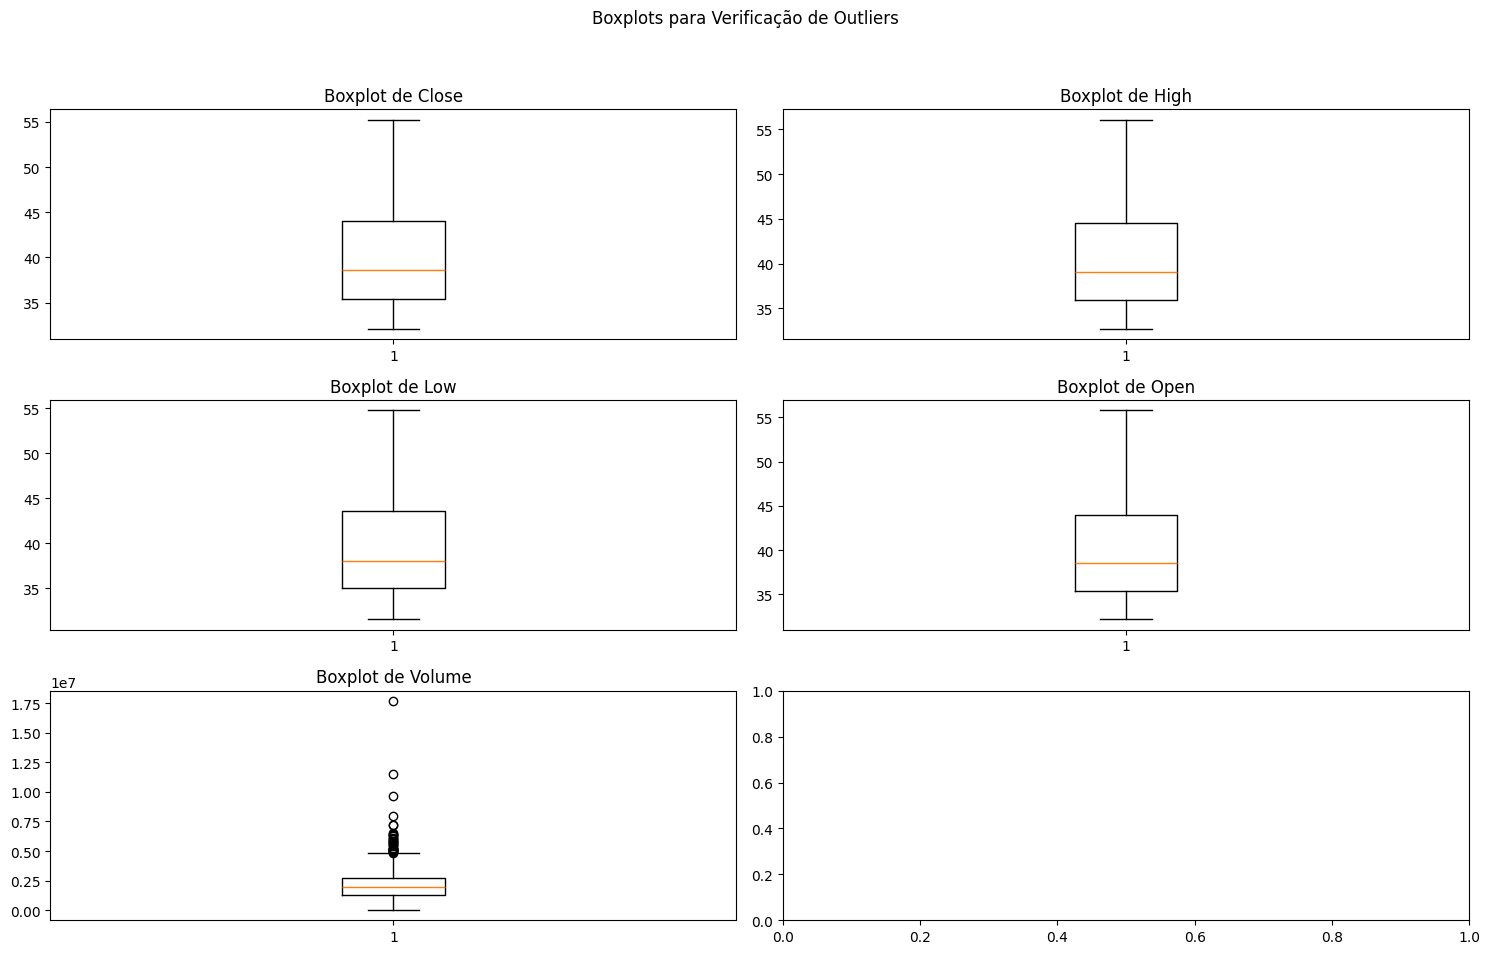

In [422]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
fig.suptitle('Boxplots para Verificação de Outliers')

#columns = [('Adj Close', 'VIVT3.SA'),
columns = [('Close', 'VIVT3.SA'), ('High', 'VIVT3.SA'),
           ('Low', 'VIVT3.SA'), ('Open', 'VIVT3.SA'), ('Volume', 'VIVT3.SA')]

for ax, col in zip(axes.flatten(), columns):
    ax.boxplot(data[col])
    ax.set_title(f'Boxplot de {col[0]}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [423]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,VIVT3.SA,VIVT3.SA,VIVT3.SA,VIVT3.SA,VIVT3.SA
count,1244.000000,1244.000000,1244.000000,1244.000000,1.244000e+03
mean,40.200755,40.673896,39.742924,40.200712,2.024460e+06
std,5.749670,5.774936,5.732386,5.732503,1.394775e+06
min,32.137951,32.757956,31.584481,32.209309,3.370000e+04
25%,35.425601,35.884951,35.030160,35.422248,1.322700e+06
50%,38.642214,39.079638,38.023055,38.581195,1.985950e+06
75%,44.049368,44.556870,43.596542,43.968240,2.732900e+06
max,55.237522,56.054907,54.764819,55.789012,1.766530e+07


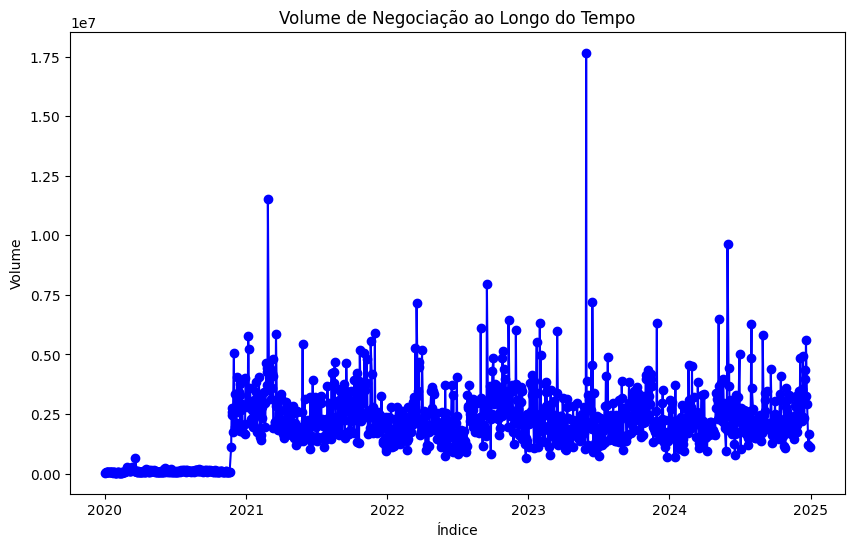

In [424]:
#Verificando col Volume
df = pd.DataFrame(data)

# Visualizar a coluna Volume
plt.figure(figsize=(10, 6))
plt.plot(df.index, df[('Volume', 'VIVT3.SA')], marker='o', linestyle='-', color='b')
plt.title('Volume de Negociação ao Longo do Tempo')
plt.xlabel('Índice')
plt.ylabel('Volume')
plt.show()

In [425]:
#Normalização e Padronização
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# scaler = MinMaxScaler()

# data_normalized = scaler.fit_transform(data)
# data_normalized = pd.DataFrame(data_normalized, columns=data.columns)

# Normalização (evitando data leakage)
train_size = int(len(data) * 0.8)
scaler = MinMaxScaler()
scaler.fit(data[:train_size])  # Ajusta apenas nos dados de treino
data_normalized = scaler.transform(data)
data_normalized = pd.DataFrame(data_normalized, columns=data.columns)

data_normalized.describe()

Price,Close,High,Low,Open,Volume
Ticker,VIVT3.SA,VIVT3.SA,VIVT3.SA,VIVT3.SA,VIVT3.SA
count,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000
mean,0.430548,0.428541,0.433362,0.422643,0.112909
std,0.307028,0.312635,0.304494,0.303176,0.079107
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.175558,0.169285,0.183028,0.169923,0.073107
50%,0.347323,0.342234,0.342006,0.336991,0.110724
75%,0.636061,0.638752,0.638059,0.621897,0.153089
max,1.233501,1.261215,1.231299,1.247064,1.000000


In [426]:
#Verificação para codificar dados categóricos
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1244 entries, 2020-01-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Close, VIVT3.SA)   1244 non-null   float64
 1   (High, VIVT3.SA)    1244 non-null   float64
 2   (Low, VIVT3.SA)     1244 non-null   float64
 3   (Open, VIVT3.SA)    1244 non-null   float64
 4   (Volume, VIVT3.SA)  1244 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.3 KB


In [427]:
#Verificando se é necessário tratamento de inconsistências
data.head()

Price,Close,High,Low,Open,Volume
Ticker,VIVT3.SA,VIVT3.SA,VIVT3.SA,VIVT3.SA,VIVT3.SA
Date,,,,,
2020-01-02,35.708035,35.989315,35.389741,35.959708,38100
2020-01-03,36.122559,36.263202,35.071453,35.634016,49900
2020-01-06,35.774662,36.240996,35.648824,36.004127,43700
2020-01-07,36.566692,36.566692,35.634018,35.737648,46400
2020-01-08,36.936790,36.951592,36.277996,36.566682,47800


# Desenvolvimento do Modelo LSTM


In [428]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import numpy as np

In [429]:
# Criando sequências de dados
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length - 1):
        x = data[i:(i + seq_length)]
        y = data[i + seq_length][0]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Definição do tamanho da sequência
seq_length = 60
X, y = create_sequences(data_normalized.values, seq_length)

X.shape, y.shape

((1183, 60, 5), (1183,))

In [430]:
# Divisão dos Dados em Treino e Teste
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:train_size + len(X) - train_size]
y_train, y_test = y[:train_size], y[train_size:train_size + len(X) - train_size]
X_train.shape, X_test.shape

((946, 60, 5), (237, 60, 5))

In [431]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import kerastuner as kt



# Construção do modelo LSTM

model = Sequential([
    LSTM(300, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), 
    kernel_regularizer=l2(0.01)),  # Regularização L2
    Dropout(0.5),
    BatchNormalization(),
    LSTM(200, return_sequences=True, kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    LSTM(100, return_sequences=False, kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(25, activation='relu'),
    Dense(1)
])

# Compilação do modelo
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse')
    


/home/ayres/Documents/pos-tech-fiap-tech-challenge-4/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [432]:
from tensorflow.keras.callbacks import EarlyStopping

#callback para evitar overfitting e economizar recursos
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=200, batch_size=128, validation_split=0.2, verbose=1, callbacks=[early_stopping])


Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 324ms/step - loss: 7.0694 - val_loss: 6.7012
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 277ms/step - loss: 6.4008 - val_loss: 6.0538
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 270ms/step - loss: 5.7844 - val_loss: 5.5262
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 277ms/step - loss: 5.2154 - val_loss: 4.9792
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 268ms/step - loss: 4.6860 - val_loss: 4.4968
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 271ms/step - loss: 4.2049 - val_loss: 4.0460
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 271ms/step - loss: 3.7627 - val_loss: 3.6340
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 271ms/step - loss: 3.3606 - val_loss: 3.2644
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 278ms/step - loss: 3.0003 - val_loss: 2.9269
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 277ms/step - loss: 2.6725 - val_loss: 2.6199
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 278ms/step - loss: 2.3809 - val_loss: 2.3468
Epoch 12/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 278ms/step - loss: 2.1

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step
MAE: 1.21, RMSE: 1.46, MAPE: 0.02, R2: 0.80


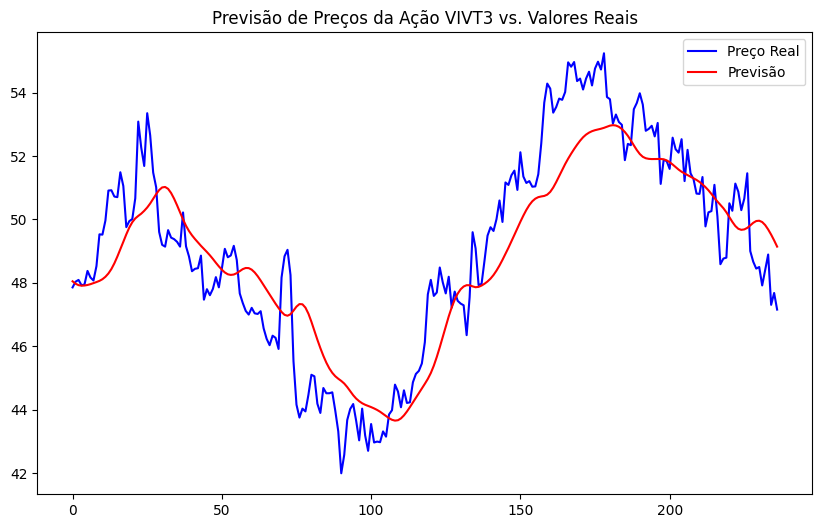

In [433]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Fazer previsões
y_pred = model.predict(X_test)

# Desnormalização
y_test_desnormalized = scaler.inverse_transform(
    np.hstack([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], data_normalized.shape[1] - 1))])
)[:, 0]

y_pred_desnormalized = scaler.inverse_transform(
    np.pad(y_pred.reshape(-1, 1), ((0, 0), (0, data_normalized.shape[1] - 1)), mode='constant')
)[:, 0]

# Avaliação do Modelo
mae = mean_absolute_error(y_test_desnormalized, y_pred_desnormalized)
rmse = np.sqrt(mean_squared_error(y_test_desnormalized, y_pred_desnormalized))
mape = mean_absolute_percentage_error(y_test_desnormalized, y_pred_desnormalized)
r2 = r2_score(y_test_desnormalized, y_pred_desnormalized)

print(f'MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}, R2: {r2:.2f}')

# Visualização das previsões
plt.figure(figsize=(10, 6))
plt.plot(y_test_desnormalized, label='Preço Real', color='blue')
plt.plot(y_pred_desnormalized, label='Previsão', color='red')
plt.legend()
plt.title('Previsão de Preços da Ação VIVT3 vs. Valores Reais')
plt.show()

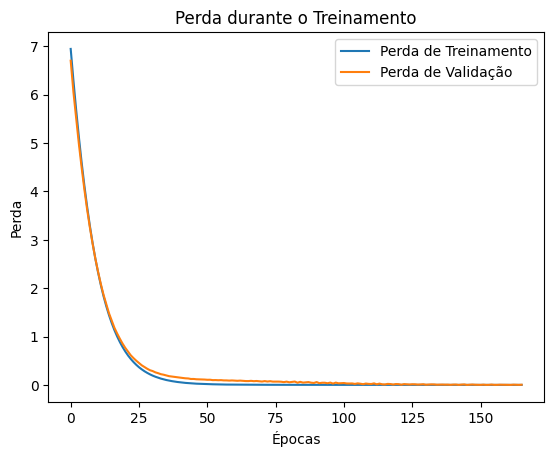

In [434]:
import matplotlib.pyplot as plt

# Plotando a perda de treinamento e validação
plt.plot(history.history['loss'], label='Perda de Treinamento')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.title('Perda durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()

In [435]:
print(f'Forma de y_test: {y_test.shape}')
print(f'Forma de y_pred: {y_pred.shape}')

Forma de y_test: (237,)
Forma de y_pred: (237, 1)


In [436]:
import pickle as pkl

# Salvando o modelo corretamente

In [437]:
#salva modelo em disco para deploy e teste
with open("modelo.pkl", "wb") as file:
    pkl.dump(model, file)

In [438]:
#salvar scaler para retreino com novos dados e teste
with open("scaler.pkl", "wb") as file:
    pkl.dump(scaler, file)

In [439]:
#carrega padronizador pra teste se esta funcionando
with open("scaler.pkl", "rb") as file:
    scaler = pkl.load(file)